# Vectors and Coordinates

## Authors
Petrus Hyvönen, SSC

## Learning Goals
* *Define Vectors*: How to define vectors in orekit / hipparchus
* *Spherical Coordinates*: How to create Spherical Coordinates and transform them between Cartesian and Spherical 

## Keywords
orekit, hipparchus, Vector3D, SphericalCoordinate

In [9]:
%matplotlib inline

Initialize orkit and bring up the python-java interface

In [10]:
import orekit_jpype
vm = orekit_jpype.initVM()

JVM already started, resuming on started JVM


Now set up the pointer to the orekit-data.zip file, using one of the helper files. The file should be in current directory if not specified otherwise.

In [11]:
from orekit_jpype.pyhelpers import setup_orekit_data, absolutedate_to_datetime
setup_orekit_data()

Now we are set up to import and use objects from the orekit library. Packages can be imported as they were native Python packages

In [12]:
from org.hipparchus.geometry.euclidean.threed import Vector3D, SphericalCoordinates

In [13]:
from org.orekit.data import DataProvidersManager, ZipJarCrawler
from org.orekit.frames import FramesFactory, TopocentricFrame
from org.orekit.bodies import OneAxisEllipsoid, GeodeticPoint
from org.orekit.time import TimeScalesFactory, AbsoluteDate, DateComponents, TimeComponents
from org.orekit.utils import IERSConventions, Constants

from org.orekit.propagation.analytical.tle import TLE, TLEPropagator
from java.io import File

from math import radians, pi, degrees
import pandas as pd
import numpy as np


## Vectors and Coordinates


Vectors in orekit are based on the `Vector3D` class from the hipparchus library (part of the orekit Python wrapper).

Note that it needs explicitly to be stated that the input parameters are floats, either by floating point notation or by for example float(10).

In [14]:
a = Vector3D(10.0, 0.0, 0.0)
a

<Vector3D: {10; 0; 0}>

In [15]:
b = Vector3D(-2.0, 10.0, 5.0)
b

<Vector3D: {-2; 10; 5}>

With these vectors a number of fundamental operations can be performed.

In [16]:
a.add(b)

<Vector3D: {8; 10; 5}>

In [17]:
a.subtract(b)

<Vector3D: {12; -10; -5}>

In [18]:
a.scalarMultiply(10.0)

<Vector3D: {100; 0; 0}>

Note that these are objects that are interfaced through the methods of the class. The normal mathematical + - operators are not available. 

_See the documentation for [Hipparcus](https://www.hipparchus.org/apidocs/) and the [Vector3D](https://www.hipparchus.org/apidocs/org/hipparchus/geometry/euclidean/threed/Vector3D.html) class._

The Vector class has some static helper functions, like the angle between the vectors (in radians):

In [19]:
degrees(Vector3D.angle(a,b))

100.14210615657399

Note that vectors are compared using class comparison methods, not the == sign which compares if the objects are the same!

In [20]:
c = Vector3D(10.0, 0.0, 0.0)
c

<Vector3D: {10; 0; 0}>

In [21]:
c.equals(a)

True

In [22]:
c == a

True

## Spherical Coordinates 

Quite often in space application we are interested in the spherical coordinates. This is available in the [SphericalCoorindinates](https://www.hipparchus.org/apidocs/org/hipparchus/geometry/euclidean/threed/SphericalCoordinates.html) class.

The conventions used are the mathematical ones, i.e. spherical coordinates are related to Cartesian coordinates as follows:

    x = r cos(θ) sin(Φ)

    y = r sin(θ) sin(Φ)

    z = r cos(Φ)

    r = √(x2+y2+z2)

    θ = atan2(y, x)

    Φ = acos(z/r)

r is the radius, θ (phi) is the azimuthal angle in the x-y plane and Φ (Theta) is the polar (co-latitude) angle. These conventions are different from the conventions used in physics where the meanings of θ and Φ are reversed.

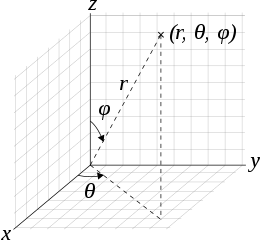

_image from Wikipedia_

There are two ways to construct SphericalCoordinates:

From angles `SphericalCoordinates(double r, double theta, double phi)`:


In [23]:
s = SphericalCoordinates(10.0, pi, pi/2)
s

<SphericalCoordinates: org.hipparchus.geometry.euclidean.threed.SphericalCoordinates@15d9bc04>

Note that the printout of SphericalCoordinate is limited. Use a print statement instead, here is a helper function:

In [31]:
def print_spherical_coordinate(x):
    print(f"r={x.getR():.2f}, Φ={x.getTheta():.2f}, θ={x.getPhi():.2f}")

In [32]:
print_spherical_coordinate(s)

r=10.00, Φ=3.14, θ=1.57


Or from an cartesian vector `SphericalCoordinates(Vector3D v)`

In [33]:
bs = SphericalCoordinates(b)
print_spherical_coordinate(bs)

r=11.36, Φ=1.77, θ=1.11


Compare if equal

In [34]:
s.equals(bs)

False

Or convert back to cartesian coordinates:

In [35]:
s.getCartesian()

<Vector3D: {-10; 0; 0}>

# Exercises 

The Earth radius is approximately 6378 km at equator. Such constants are available in the orekit module `Constants`. SI units are used.

In [36]:
from org.orekit.utils import Constants

In [37]:
Constants.WGS84_EARTH_EQUATORIAL_RADIUS

6378137.0

Assuming a spherical Earth of equatorial radius, what is the cartesian coordinates for an earth centric earth fixed coordinate system for the town of Kiruna, located at 67.8558° N, 20.2253° E? Note the difference in definition of spherical coordinate systems.

Answer: